In [5]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import re
import fitz
from io import BytesIO
import string
import pandas as pd
import pickle
import time
import numpy as np

In [6]:
k = 10

In [3]:
url = "https://www.sejm.gov.pl/Sejm10.nsf/agent.xsp?symbol=posglos&NrKadencji=10"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the webpage
soup = BeautifulSoup(response.content, "html.parser")

# Find all links containing "IdDnia" in the href attribute
links = soup.find_all("a", href=lambda href: href and "IdDnia" in href)


clean_links = []
for link in links:
    clean_links.append(f'https://www.sejm.gov.pl/Sejm{k}.nsf/' + link['href'])

<!DOCTYPE html>

<html><head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="no-cache" http-equiv="CacheControl"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="data:;base64,iVBORw0KGgo=" rel="shortcut icon"/>
<script type="text/javascript">
(function(){
window["bobcmn"] = "101110101010102000000062000000052000000062000000012a8269e27200000096200000000200000002300000000300000000300000006/TSPD/300000008TSPD_10130000000cTSPD_101_DID300000005https3000000d008a02c1a15ab2000035f98e91cc0c1183f23061478c16adf2c0e1411a113e4995bfed62805d226380847cdd8510a38005704b60ea22b6d407ee0d2308649988e4bbba267a5af45f5422e0befbeda71af929c4d2b6e7f555da534186ecf38fc103537eea66966be81300000002TS200000000200000000";

window["failureConfig"] = "524f6f70732e2e2e2e736f6d657468696e672077656e742077726f6e672e2e2e2e20796f757220737570706f72742069642069733a2025444f534c372e6368616c6c656e67652e737570706f72745f6964252e1431333039373837323
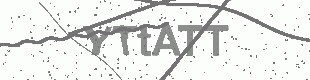
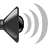
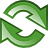

In [7]:
soup

In [14]:
clean_links_1 = []
for url in clean_links:    
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    links = soup.find_all("a", href=lambda href: href and "NrGlosowania" in href)

    for link in links:
        clean_links_1.append(f'https://www.sejm.gov.pl/Sejm{k}.nsf/' + link['href'])

clean_links_1 = list(set(clean_links_1))  

In [15]:
clean_links_1

['https://www.sejm.gov.pl/Sejm10.nsf/agent.xsp?symbol=glosowania&NrKadencji=10&NrPosiedzenia=2&NrGlosowania=12',
 'https://www.sejm.gov.pl/Sejm10.nsf/agent.xsp?symbol=glosowania&NrKadencji=10&NrPosiedzenia=2&NrGlosowania=19',
 'https://www.sejm.gov.pl/Sejm10.nsf/agent.xsp?symbol=glosowania&NrKadencji=10&NrPosiedzenia=4&NrGlosowania=4',
 'https://www.sejm.gov.pl/Sejm10.nsf/agent.xsp?symbol=glosowania&NrKadencji=10&NrPosiedzenia=1&NrGlosowania=71',
 'https://www.sejm.gov.pl/Sejm10.nsf/agent.xsp?symbol=glosowania&NrKadencji=10&NrPosiedzenia=1&NrGlosowania=7',
 'https://www.sejm.gov.pl/Sejm10.nsf/agent.xsp?symbol=glosowania&NrKadencji=10&NrPosiedzenia=1&NrGlosowania=30',
 'https://www.sejm.gov.pl/Sejm10.nsf/agent.xsp?symbol=glosowania&NrKadencji=10&NrPosiedzenia=8&NrGlosowania=3',
 'https://www.sejm.gov.pl/Sejm10.nsf/agent.xsp?symbol=glosowania&NrKadencji=10&NrPosiedzenia=1&NrGlosowania=85',
 'https://www.sejm.gov.pl/Sejm10.nsf/agent.xsp?symbol=glosowania&NrKadencji=10&NrPosiedzenia=9&NrGl

In [17]:
len(clean_links_1)

328

In [19]:
with open(f'clean_links_{k}.pkl', 'wb') as f:
    pickle.dump(clean_links_1, f)

In [20]:
vote_results_links = []
headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 6.0; WOW64; rv:24.0) Gecko/20100101 Firefox/24.0' }
# headers={'User-Agent': 'Chrome/35.0.1916.47'}
r = requests.get(url, headers=headers)
for url in tqdm(clean_links_1):
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")
    a = soup.find("a", text="Wyniki indywidualne")
    if a:
        vote_results_links.append(a['href'])
    else:
        print('sus url', url)
    time.sleep(1)

100%|████████████████████████████████████████████████████████████████████████████████| 328/328 [07:53<00:00,  1.44s/it]


In [21]:
len(vote_results_links)

328

In [22]:
with open(f'vote_results_links_{k}.pkl', 'wb') as f:
    pickle.dump(vote_results_links, f)

In [4]:
vote_results_links = pickle.load(open(f'vote_results_links_{k}.pkl', 'rb'))

https://www.sejm.gov.pl/sejm9.nsf/agent.xsp?symbol=glosowania&NrKadencji=9&NrPosiedzenia=8&NrGlosowania=6

leads to 

https://orka.sejm.gov.pl/Glos9.nsf/nazwa/8_6/$file/GLOS_8_6.PDF

XDD

In [24]:
vote_results_links

['http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&2_12',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&2_19',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&4_4',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&1_71',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&1_7',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&1_30',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&8_3',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&1_85',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&9_13',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&5_6',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&1_113',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&7_2',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&1_142',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&1_72',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&6_12',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&9_36',
 'http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&5_18',
 'http://orka.sej

# 9th

In [61]:
# df = pd.DataFrame()

headers={'User-Agent': 'Chrome/35.0.1916.47'}
# headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 6.0; WOW64; rv:24.0) Gecko/20100101 Firefox/24.0' }

for pdf_url in tqdm(vote_results_links):
#     print(pdf_url)
    response = requests.get(url=pdf_url, headers=headers, timeout=120)
    on_fly_mem_obj = BytesIO(response.content)
    doc = fitz.open(stream=on_fly_mem_obj, filetype="pdf")
    
    all_text = ""
    for page in doc:
        all_text += '\n' + page.get_text()

    parties = re.findall("\n\w*.*\(\d+\)", all_text)
    if pdf_url == vote_results_links[2287]:
        parties.remove('\n(11)')
    clean_parties = [re.sub("\n", '', party) for party in parties]
    clean_parties = [re.sub("\(\d+\)", '', party).strip() for party in clean_parties]

    pattern = re.compile("\(\d+\)")
    deputies_per_club = [int(pattern.search(party).group(0)[1:-1]) for party in parties]

    xs = re.split("\n\w+.+\(\d+\)", all_text)
    
    # for the sake of my mental health I decided to ignore votings like:
    # https://orka.sejm.gov.pl/Glos9.nsf/nazwa/47_126/$file/Glos_47_126.pdf
    # because they have much different structure than 'normal' votings
    # and I have much better things to do
    # still I ingoned only 5 (out of 9388) so I don't feel guilty
    if 'posiedzenie' not in xs[0].lower():
        print(pdf_url)
        continue

    posiedzenie_id = re.findall("posiedzenie \d+", xs[0].lower())[0]
    glosowanie_id = re.findall("sowanie nr \d+", xs[0])[0]
    data_time = re.findall("\d+.\d+.\d+\s\d+:\d+:\d+", xs[0])[0]
    posiedzenie_id = re.findall("\d+", posiedzenie_id)[0]
    glosowanie_id = re.findall("\d+", glosowanie_id)[0]

    for i in range(1, len(xs)):
        x = xs[i]
        x = re.sub("\n[\s\w.]+\s*-\s*\d+", '', x)
#         x = re.sub(r"\n\bPosiedzenie\b.+\n", '', x)
#         x = re.sub(r"\n\bPosiedzenie\b.+\n.*\bStrona.*\n", '', x)

        names = re.split("[za|pr\.|ng\.|ws\.]+", x)
        clean_names = []
        for name in names:
            name = re.sub("[\n\d]", '', name)
            name = re.sub("  ", ' ', name)
            name = name.strip()
            if len(name) > 0:
                clean_names.append(name)

        votes = re.findall("[za|pr\.|ng\.|ws\.]+", x)

        party = [clean_parties[i - 1]] * deputies_per_club[i - 1]

        df_sub = pd.DataFrame({
                'kadencja': k,
                'posiedzenie': posiedzenie_id,
                'numer': glosowanie_id,
                'data_godzina': data_time,
                'NazwiskoImie': clean_names[0:deputies_per_club[i - 1]], 
                'Glos': votes[0:deputies_per_club[i - 1]],
                'Klub': party
        })

        df = pd.concat([df, df_sub], ignore_index=True)
        
    if pdf_url == vote_results_links[2287]:
        party = ['Konfederacja'] * 11
        clean_names = ['KORWIN-MIKKE JANUSZ', 'BRAUN GRZEGORZ', 'TUDUJ KRZYSZTOF', 'KULESZA JAKUB', 
                       'SOŚNIERZ DOBROMIR', 'DZIAMBOR ARTUR', 'URBANIAK MICHAŁ', 'WINNICKI ROBERT', 
                       'BOSAK KRZYSZTOF', 'KAMIŃSKI KRYSTIAN',  'BERKOWICZ KONRAD']
        votes = ['za', 'pr.', 'ws.', 'ng.', 'za', 'pr.', 'ws.', 'ng.', 'pr.', 'ws.', 'ng']
        df_sub = pd.DataFrame({
                'kadencja': k,
                'posiedzenie': posiedzenie_id,
                'numer': glosowanie_id,
                'data_godzina': data_time,
                'NazwiskoImie': clean_names, 
                'Glos': votes,
                'Klub': party
        })
        df = pd.concat([df, df_sub], ignore_index=True)

 12%|█████████▎                                                                   | 859/7101 [15:32<1:35:16,  1.09it/s]

http://orka.sejm.gov.pl/Glos9.nsf/dok?OpenAgent&61_141


 53%|███████████████████████████████████████▏                                  | 3759/7101 [1:33:51<1:17:10,  1.39s/it]

http://orka.sejm.gov.pl/Glos9.nsf/dok?OpenAgent&31_18


 63%|██████████████████████████████████████████████▍                           | 4454/7101 [1:59:04<1:23:59,  1.90s/it]

http://orka.sejm.gov.pl/Glos9.nsf/dok?OpenAgent&34_1


 75%|█████████████████████████████████████████████████████████▎                  | 5358/7101 [2:34:01<52:00,  1.79s/it]

http://orka.sejm.gov.pl/Glos9.nsf/dok?OpenAgent&1_53


100%|████████████████████████████████████████████████████████████████████████████| 7101/7101 [3:53:17<00:00,  1.97s/it]


In [13]:
df2 = df.astype({
                'kadencja': 'int32',
                'posiedzenie': 'int32',
                'numer': 'int32',
                })

df2['data_godzina'] = pd.to_datetime(df['data_godzina'], format='mixed')

df2['vote_id'] = df2['kadencja'] * 10**6 + df2['posiedzenie'] * 10**3 + df2['numer']

In [76]:
df2['vote_id'].unique().size

9383

In [89]:
df2['Klub'].unique()

array(['PiS', 'KO', 'Lewica', 'PSL-Kukiz15', 'Konfederacja', 'niez.',
       'KP', 'Polska2050', 'Porozumienie', 'Kukiz15', 'LD', 'PS',
       'Wolnościowcy', 'PPS', 'SLD', 'PSL', 'WP'], dtype=object)

In [86]:
to_drop = df2[df2['vote_id'] == 9063060].index

In [87]:
df2 = df2.drop(to_drop)

In [91]:
df2['NazwiskoImie'].unique()

array(['ADAMCZYK ANDRZEJ', 'GOŁOJUCH KAZIMIERZ', 'MACIEREWICZ ANTONI',
       'SOIN AGNIESZKA', 'ANDRUSZKIEWICZ ADAM', 'GONCIARZ JAROSŁAW',
       'MAKSYMOWICZ WOJCIECH', 'SOŚNIERZ ANDRZEJ', 'ANDZEL WALDEMAR',
       'GONTARZ ROBERT', 'MALĄG MARLENA MAGDALENA', 'SÓJKA KATARZYNA',
       'ARDANOWSKI JAN KRZYSZTOF', 'GOSEK MARIUSZ', 'MALIK EWA',
       'SROKA MAGDALENA', 'ARENT IWONA', 'GOSIEWSKA MAŁGORZATA',
       'MAŁECKI JERZY', 'STACHOWIAK-RÓŻECKA MIROSŁAWA', 'AST MAREK',
       'GOWIN JAROSŁAW', 'MAŁECKI MACIEJ', 'STEFANIUK DARIUSZ',
       'BABALSKI ZBIGNIEW', 'GÓRSKA AGNIESZKA', 'MASŁOWSKA GABRIELA',
       'STRZAŁKA BEATA', 'BABINETZ PIOTR', 'GÓRSKI MACIEJ',
       'MATERNA JERZY', 'SUSKI MAREK', 'BARTOSIK RYSZARD',
       'GRÓBARCZYK MAREK', 'MATEUSIAK-PIELUCHA BEATA', 'SZAŁABAWKA ARTUR',
       'BARTUŚ BARBARA', 'GUT-MOSTOWY ANDRZEJ', 'MATUSIAK GRZEGORZ',
       'SZARAMA WOJCIECH', 'BASZKO MIECZYSŁAW', 'GWIAZDOWSKI KAZIMIERZ',
       'MATUSZEWSKI MAREK', 'SZCZUDŁO ALEKSANDRA',

In [93]:
df2 = df2.reset_index(drop=True)

In [96]:
df2 = df2.sort_values('vote_id')

In [98]:
df2.to_csv(f'scraped_data/kadencja_{k}.csv', index=False)

# 10th

In [26]:
link = ['http://orka.sejm.gov.pl/Glos10.nsf/dok?OpenAgent&2_12']

In [72]:
headers

{'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36 OPR/109.0.0.0'}

In [84]:
headers_list = [
{'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'},       
{'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'},
{'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36 Edg/123.0.2420.81'},
# {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36 OPR/109.0.0.0'},
{'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'},
{'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 14.4; rv:124.0) Gecko/20100101 Firefox/124.0'},
{'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 14_4_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.4.1 Safari/605.1.15'},
{'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 14_4_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36 OPR/109.0.0.0'},
{'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'},
{'User-Agent': 'Mozilla/5.0 (X11; Linux i686; rv:124.0) Gecko/20100101 Firefox/124.0'}]

In [85]:
# df = pd.DataFrame()

# headers={'User-Agent': 'Chrome/37.0.1916.47'}
# headers = { 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36' }


for pdf_url in tqdm(vote_results_links):
# for pdf_url in link:
#     print(pdf_url)
    headers = np.random.choice(headers_list, 1)[0]
    response = requests.get(url=pdf_url, headers=headers, timeout=120)
#     response = requests.get(url=pdf_url, timeout=120)
    on_fly_mem_obj = BytesIO(response.content)
    doc = fitz.open(stream=on_fly_mem_obj, filetype="pdf")
    
    all_text = ""
    for page in doc:
        all_text += '\n' + page.get_text()

    parties = re.findall("\n\w*.*\(\d+\)", all_text)
    clean_parties = [re.sub("\n", '', party) for party in parties]
    clean_parties = [re.sub("\(\d+\)", '', party).strip() for party in clean_parties]

    pattern = re.compile("\(\d+\)")
    deputies_per_club = [int(pattern.search(party).group(0)[1:-1]) for party in parties]

    xs = re.split("\n\w+.+\(\d+\)", all_text)
    if 'posiedzenie' not in xs[0].lower():
        print(pdf_url)
        continue

    posiedzenie_id = re.findall("posiedzenie \d+", xs[0].lower())[0]
    glosowanie_id = re.findall("sowanie nr \d+", xs[0])[0]
    data_time = re.findall("\d+.\d+.\d+\s\d+:\d+:\d+", xs[0])[0]
    posiedzenie_id = re.findall("\d+", posiedzenie_id)[0]
    glosowanie_id = re.findall("\d+", glosowanie_id)[0]

    for i in range(1, len(xs)):
        x = xs[i]
        x = re.sub("\n[\s\w.]+\s*-\s*\d+", '', x)

        names = re.split(r"[za|pr.|ng.|ws.]+", x)
        clean_names = []
        for name in names:
            name = re.sub("[\n\d]", '', name)
            name = re.sub("  ", ' ', name)
            name = name.strip()
            if len(name) > 0:
                clean_names.append(name)

        votes = re.findall(r"[za|pr.|ng.|ws.]+", x)
        party = [clean_parties[i - 1]] * deputies_per_club[i - 1]

        df_sub = pd.DataFrame({
                'kadencja': k,
                'posiedzenie': posiedzenie_id,
                'numer': glosowanie_id,
                'data_godzina': data_time,
                'NazwiskoImie': clean_names[0:deputies_per_club[i - 1]], 
                'Glos': votes[0:deputies_per_club[i - 1]],
                'Klub': party
        })
#         display(df_sub)
        df = pd.concat([df, df_sub], ignore_index=True)
    time.sleep(1)

  9%|███████▍                                                                         | 22/239 [00:53<08:49,  2.44s/it]


ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'Istniejące połączenie zostało gwałtownie zamknięte przez zdalnego hosta', None, 10054, None))

In [89]:
df

,kadencja,posiedzenie,numer,data_godzina,NazwiskoImie,Glos,Klub,vote_id
0,10,2,12,2024-01-16 19:41:29,ADAMCZYK ANDRZEJ,za,PiS,10002012
1,10,2,12,2024-01-16 19:41:29,ANDRUSZKIEWICZ ADAM,za,PiS,10002012
2,10,2,12,2024-01-16 19:41:29,ANDZEL WALDEMAR,za,PiS,10002012
3,10,2,12,2024-01-16 19:41:29,ARCISZEWSKA-MIELEWCZYK DOROTA,za,PiS,10002012
4,10,2,12,2024-01-16 19:41:29,ARDANOWSKI JAN KRZYSZTOF,za,PiS,10002012
...,...,...,...,...,...,...,...,...
54583,10,9,32,2024-04-12 14:42:30,KUKIZ PAWEŁ,za,Kukiz15,10009032
54584,10,9,32,2024-04-12 14:42:30,SACHAJKO JAROSŁAW,pr.,Kukiz15,10009032
54585,10,9,32,2024-04-12 14:42:30,JAKUBIAK MAREK,ws.,Kukiz15,10009032
54586,10,9,32,2024-04-12 14:42:30,PAWŁOWSKA MONIKA,za,niez.,10009032


In [58]:
df2 = df.astype({
                'kadencja': 'int32',
                'posiedzenie': 'int32',
                'numer': 'int32',
                })

df2['data_godzina'] = pd.to_datetime(df['data_godzina'], format='mixed')

df2['vote_id'] = df2['kadencja'] * 10**6 + df2['posiedzenie'] * 10**3 + df2['numer']

,kadencja,posiedzenie,numer,data_godzina,NazwiskoImie,Glos,Klub
0,10,2,12,2024-01-16 19:41:29,ADAMCZYK ANDRZEJ,za,PiS
1,10,2,12,2024-01-16 19:41:29,ANDRUSZKIEWICZ ADAM,za,PiS
2,10,2,12,2024-01-16 19:41:29,ANDZEL WALDEMAR,za,PiS
3,10,2,12,2024-01-16 19:41:29,ARCISZEWSKA-MIELEWCZYK DOROTA,za,PiS
4,10,2,12,2024-01-16 19:41:29,ARDANOWSKI JAN KRZYSZTOF,za,PiS
...,...,...,...,...,...,...,...
452,10,2,12,2024-01-16 19:41:29,WILK RYSZARD,ng.,Konfederacja
453,10,2,12,2024-01-16 19:41:29,WIPLER PRZEMYSŁAW,ng.,Konfederacja
454,10,2,12,2024-01-16 19:41:29,JAKUBIAK MAREK,za,Kukiz15
455,10,2,12,2024-01-16 19:41:29,KUKIZ PAWEŁ,za,Kukiz15


In [86]:
df = df.astype({
                'kadencja': 'int32',
                'posiedzenie': 'int32',
                'numer': 'int32',
                })

df['data_godzina'] = pd.to_datetime(df['data_godzina'], format='mixed')

df['vote_id'] = df['kadencja'] * 10**6 + df['posiedzenie'] * 10**3 + df['numer']

In [87]:
df['vote_id'].unique().size

111

In [94]:
df['Glos'].unique()

array(['za', 'ws.', 'ng.', 'pr.'], dtype=object)

In [98]:
df[df['vote_id'] == 10001001]

,kadencja,posiedzenie,numer,data_godzina,NazwiskoImie,Glos,Klub,vote_id


In [93]:
to_drop = df[(df['vote_id'] == 10001001) | (df['vote_id'] == 10002011)].index
df = df.drop(to_drop)
df = df.reset_index(drop=True)
df = df.sort_values('vote_id')

In [ ]:
df['Glos'].unique()

In [95]:
df['Klub'].unique()

array(['Polska2050', 'KO', 'Nowa Lewica', 'PSL', 'Konfederacja', 'PiS',
       'Kukiz15', 'Polska2050-TD', 'PSL-TD', 'Lewica', 'niez.'],
      dtype=object)

In [96]:
df['NazwiskoImie'].unique()

array(['CWALINA-ŚLIWOWSKA ŻANETA', 'SZCZERBA MICHAŁ', 'SUSKI PAWEŁ',
       'SOWA MAREK', 'SOBOLAK ANNA', 'SMARDUCH WERONIKA',
       'SŁUGOCKI WALDEMAR', 'SKOWROŃSKA KRYSTYNA',
       'SIENKIEWICZ BARTŁOMIEJ', 'SIEMONIAK TOMASZ', 'SIEMASZKO RAFAŁ',
       'SIBIŃSKA KRYSTYNA', 'SAŁUGA WOJCIECH', 'RZĄSA MAREK',
       'RUTNICKI JAKUB', 'RUSIECKI GRZEGORZ', 'ROSA MONIKA',
       'RAK RENATA URSZULA', 'PROTAS JACEK', 'POMASKA AGNIESZKA',
       'POLAK ELŻBIETA ANNA', 'PLOCKE KAZIMIERZ',
       'PIETRZCZYK LUCJAN MAREK', 'PIEKARSKA KATARZYNA MARIA',
       'PĘPEK MAŁGORZATA', 'PAWLICZAK KAROLINA', 'SZEWIŃSKI ANDRZEJ',
       'PAPKE PAWEŁ', 'SZŁAPKA ADAM', 'SZUMILAS KRYSTYNA',
       'WOŁOSZAŃSKI BOGUSŁAW', 'KOŁODZIEJCZAK MAGDALENAMAŁGORZATA',
       'GROMADZKA MAŁGORZATA', 'ZIELIŃSKA URSZULA SARA',
       'ZEMBACZYŃSKI WITOLD', 'ZDROJEWSKI BOGDAN ANDRZEJ',
       'ZAWIEJA BARTOSZ', 'WRÓBEL MACIEJ', 'WOJCIECHOWSKA ANNA',
       'WITEK PRZEMYSŁAW', 'WITCZAK MARIUSZ', 'WITCZAK ADRIAN',
      

In [60]:
df[df['Glos'] == 'ag']

,kadencja,posiedzenie,numer,data_godzina,NazwiskoImie,Glos,Klub,vote_id
99857,10,1,1,2023-11-13 15:17:22,k,ag,KO,10001001
105795,10,2,11,2024-01-16 19:40:02,Ki,ag,KO,10002011


In [59]:
df = df.sort_values('vote_id')
df.to_csv(f'scraped_data/kadencja_{k}.csv', index=False)